<a href="https://colab.research.google.com/github/Jungin1020/Aiffel_exp/blob/main/220109_exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [23]:
from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
import glob

from skimage import color

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
def resize_images(img_path):
  images = glob.glob(img_path + '/*.jpg')

  print(len(images), 'images to be resized.')

  target_size = (28,28)
  for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

  print(len(images), 'images resized.')


image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/rock'
resize_images(image_dir_path)

print('Rock images resizing is done.')

600 images to be resized.
600 images resized.
Rock images resizing is done.


In [108]:
image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/scissor'
resize_images(image_dir_path)

print('Scissor images resizing is done.')

600 images to be resized.
600 images resized.
Scissor images resizing is done.


In [109]:
image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/paper'
resize_images(image_dir_path)

print('Paper images resizing is done.')

600 images to be resized.
600 images resized.
Paper images resizing is done.


In [110]:
def load_data(img_path, number_of_data = 1800):
  img_size = 28
  color = 3 #흑백이미지라 1을 넣었는데 오류나서 3으로 바꿈
  imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
  labels = np.zeros(number_of_data,dtype=np.int32) #int32가 뭐여...

  idx = 0
  for file in glob.iglob(img_path + '/rock/*.jpg'):
    img = np.array(Image.open(file),dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx] = 0 # 바위 : 0
    idx = idx+1

  
  for file in glob.iglob(img_path + '/scissor/*.jpg'):
    img = np.array(Image.open(file),dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx] = 1 # 가위 : 1
    idx = idx+1
    
  
  for file in glob.iglob(img_path + '/paper/*.jpg'):
    img = np.array(Image.open(file),dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx] = 2 # 보 : 2
    idx = idx+1
    

  print('Amount of train data is', idx)
  return imgs, labels

image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/'
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0

print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))


Amount of train data is 1800
x_train shape: (1800, 28, 28, 3)
y_train shape: (1800,)


라벨:  0


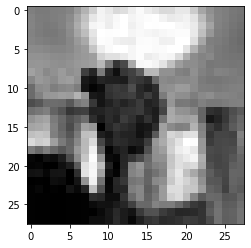

In [111]:
plt.imshow(x_train[0])
print('라벨: ',y_train[0])

In [112]:

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(28,28,3)))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))


model.summary()

Model에 추가된 Layer 개수:  9
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_31 (MaxPoolin 

In [117]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=80)

Epoch 1/80
57/57 [==============================] - 2s 24ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 2/80
57/57 [==============================] - 1s 25ms/step - loss: 9.5739e-04 - accuracy: 1.0000
Epoch 3/80
57/57 [==============================] - 1s 24ms/step - loss: 1.9517e-04 - accuracy: 1.0000
Epoch 4/80
57/57 [==============================] - 1s 24ms/step - loss: 1.3476e-04 - accuracy: 1.0000
Epoch 5/80
57/57 [==============================] - 1s 25ms/step - loss: 1.2332e-04 - accuracy: 1.0000
Epoch 6/80
57/57 [==============================] - 1s 24ms/step - loss: 1.0641e-04 - accuracy: 1.0000
Epoch 7/80
57/57 [==============================] - 1s 25ms/step - loss: 9.6938e-05 - accuracy: 1.0000
Epoch 8/80
57/57 [==============================] - 1s 25ms/step - loss: 8.9372e-05 - accuracy: 1.0000
Epoch 9/80
57/57 [==============================] - 1s 24ms/step - loss: 8.1513e-05 - accuracy: 1.0000
Epoch 10/80
57/57 [==============================] - 1s 24ms/step - loss: 7.7

In [118]:
# 테스트 데이터 준비

def resize_images(img_path):
  images = glob.glob(img_path + '/*.jpg')

  print(len(images), 'images to be resized.')

  target_size = (28,28)
  for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

  print(len(images), 'images resized.')


image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/rock_scissor_paper_test/rock'
resize_images(image_dir_path)

print('Rock test images resizing is done.')

image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/rock_scissor_paper_test/scissor'
resize_images(image_dir_path)

print('Scissor test images resizing is done.')

image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/rock_scissor_paper_test/paper'
resize_images(image_dir_path)

print('Paper test images resizing is done.')

100 images to be resized.
100 images resized.
Rock test images resizing is done.
100 images to be resized.
100 images resized.
Scissor test images resizing is done.
100 images to be resized.
100 images resized.
Paper test images resizing is done.


In [119]:
def load_data(img_path, number_of_data = 300):
  img_size = 28
  color = 3
  imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
  labels = np.zeros(number_of_data,dtype=np.int32) 

  idx = 0
  for file in glob.iglob(img_path + '/rock/*.jpg'):
    img = np.array(Image.open(file),dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx] = 0 # 바위 : 0
    idx = idx+1

  
  for file in glob.iglob(img_path + '/scissor/*.jpg'):
    img = np.array(Image.open(file),dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx] = 1 # 가위 : 1
    idx = idx+1
    
  
  for file in glob.iglob(img_path + '/paper/*.jpg'):
    img = np.array(Image.open(file),dtype=np.int32)
    imgs[idx,:,:,:] = img
    labels[idx] = 2 # 보 : 2
    idx = idx+1
    

  print('Amount of train data is', idx)
  return imgs, labels

image_dir_path = '/content/drive/MyDrive/aiffel/rock_scissor_paper/rock_scissor_paper_test/'
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0

print('x_train shape: {}'.format(x_test.shape))
print('y_train shape: {}'.format(y_test.shape))


Amount of train data is 300
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [120]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print('test_loss: {}'.format(test_loss))
print('test_accuracy: {}'.format(test_accuracy))

10/10 - 0s - loss: 5.9302 - accuracy: 0.7133 - 271ms/epoch - 27ms/step
test_loss: 5.930184841156006
test_accuracy: 0.7133333086967468
